In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


# > ***Evaluation of Decision Tree Classifier Performance on Iris Dataset with Varying Test Sizes***

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
# print(iris)

In [4]:
X, y = iris.data, iris.target

print(X.shape, len(y))

(150, 4) 150


In [5]:
clf = tree.DecisionTreeClassifier()

aris = []   #adjusted rand index score for each test size
precision_scores = []
f1_scores = []
j = [0.2, 0.3, 0.4, 0.5]

In [6]:
for i in j:
    X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size = i, random_state = 42)
    print(X_train.shape, test_x.shape, len(y_train), len(test_lab))
    
    clg = clf.fit(X_train, y_train)
    test_pred_deci_tree = clf.predict(test_x)
    
    print(test_pred_deci_tree, len(test_pred_deci_tree))
    print(test_lab, len(test_lab))
    
    print("ARI", adjusted_rand_score(test_pred_deci_tree, test_lab))
    aris.append(adjusted_rand_score(test_pred_deci_tree, test_lab))
    
    print("precision score", precision_score(test_pred_deci_tree, test_lab, average = "weighted"))
    precision_scores.append(precision_score(test_pred_deci_tree, test_lab, average = "weighted"))
    
    print("f1 score", f1_score(test_pred_deci_tree, test_lab, average = "weighted"))
    f1_scores.append(f1_score(test_pred_deci_tree, test_lab, average = "weighted"))
    
    print("confusion matrix: \n", confusion_matrix(test_pred_deci_tree, test_lab, labels=[0, 1, 2]))
    print("*********************************************************")
    print("")

(120, 4) (30, 4) 120 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
ARI 1.0
precision score 1.0
f1 score 1.0
confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*********************************************************

(105, 4) (45, 4) 105 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
ARI 1.0
precision score 1.0
f1 score 1.0
confusion matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
*********************************************************

(90, 4) (60, 4) 90 60
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1] 60
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1] 60
ARI 0.9100036172880218
precision score 0.9

In [7]:
j1 = ["0.2", "0.3", "0.4", "0.5"]
print(aris)
print(precision_scores)
print(f1_scores)

[1.0, 1.0, 0.9100036172880218, 0.8629595792488703]
[1.0, 1.0, 0.9666666666666667, 0.9489855072463769]
[1.0, 1.0, 0.9666666666666667, 0.9467676767676767]


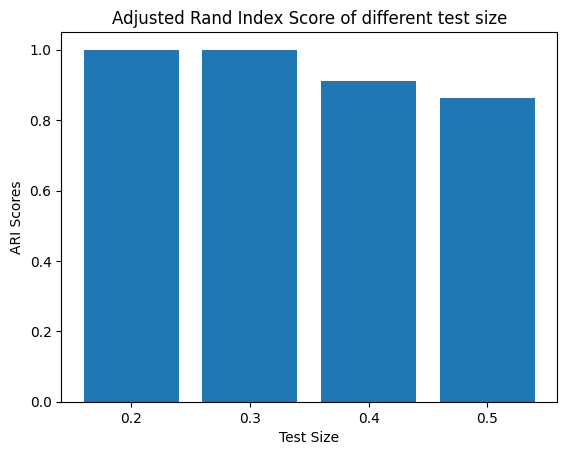

In [8]:
# plotting ari scores

fig = plt.figure()
plt.bar(j1, aris)
plt.xlabel("Test Size")
plt.ylabel("ARI Scores")
plt.title("Adjusted Rand Index Score of different test size")
plt.show()

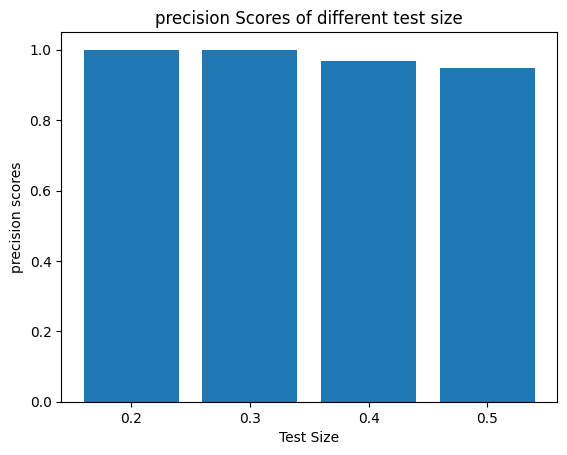

In [9]:
# plotting precision scores

fig = plt.figure()
plt.bar(j1, precision_scores)
plt.xlabel("Test Size")
plt.ylabel("precision scores")
plt.title("precision Scores of different test size")
plt.show()

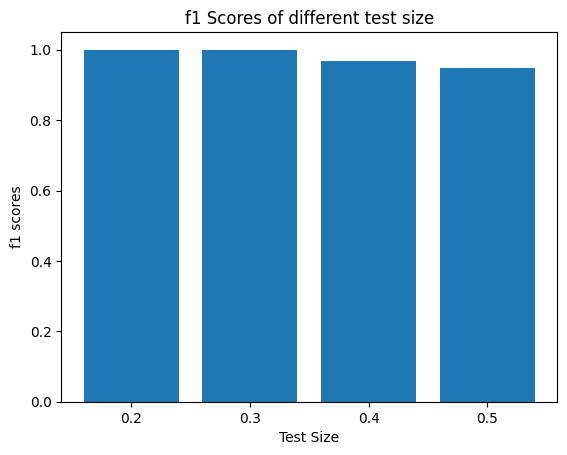

In [10]:
# plotting f1 scores

fig = plt.figure()
plt.bar(j1, f1_scores)
plt.xlabel("Test Size")
plt.ylabel("f1 scores")
plt.title("f1 Scores of different test size")
plt.show()